## Classification

In [17]:
# Standard Data manipulation and visualization
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# Data pre-processing
from sklearn.model_selection import train_test_split

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

# Cross validation
from sklearn.model_selection import  cross_val_score

# Stochatic Gradient decent classifier
from sklearn.linear_model import SGDClassifier

# Support Vector Machine 
from sklearn.svm import SVC

# Grid Search 
from sklearn.model_selection import GridSearchCV

In [7]:
# Load data set
wine=pd.read_csv('C:/Users/kurtk/OneDrive/Documents/Python projects/Classification/winequality-red.csv')

In [8]:
# Show the first ten rows in the data set 
print("First ten rows", wine.head(10))
# Show the last ten rows in the data set
print("Last ten rows", wine.tail(10))

First ten rows    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.997

In [9]:
# She all information for the data set
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data visualization

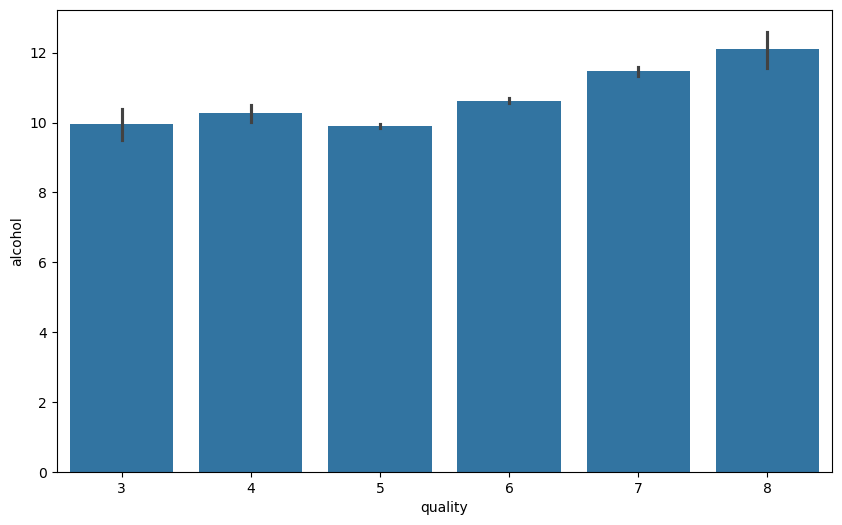

In [19]:
# Aclohol vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

plt.show()

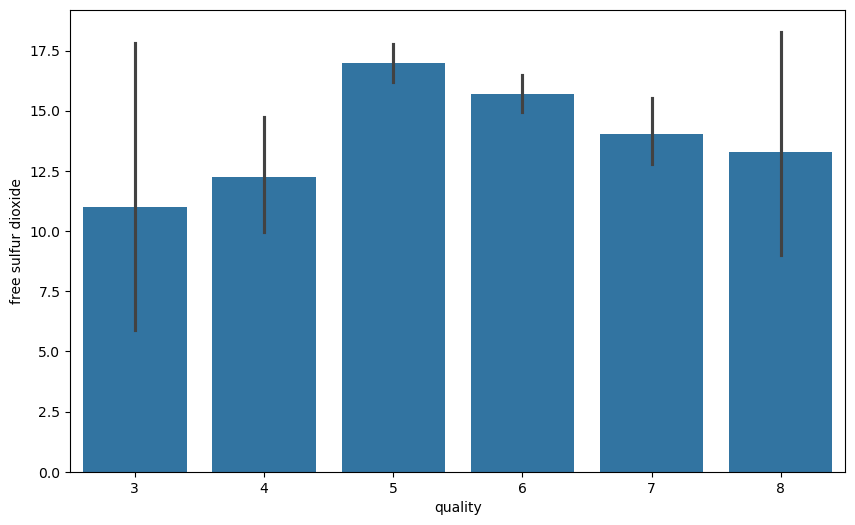

In [20]:
# Sulfur vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

plt.show()

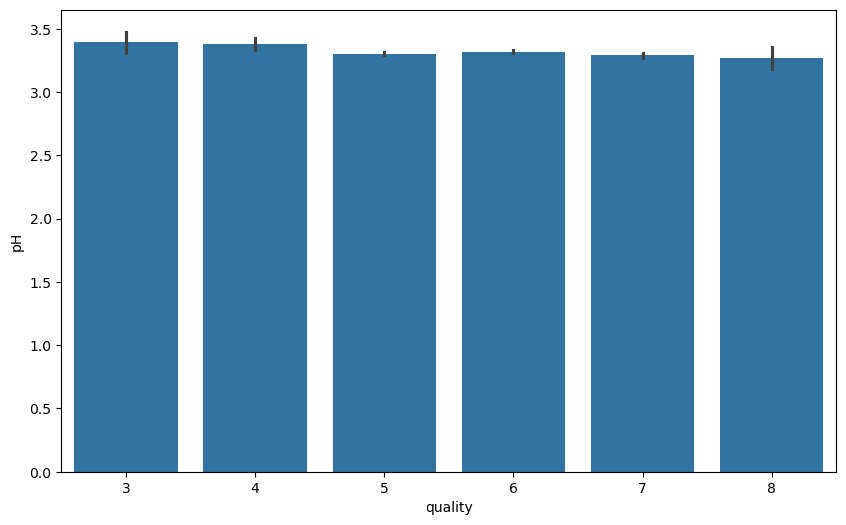

In [21]:
# pH vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine)

plt.show()

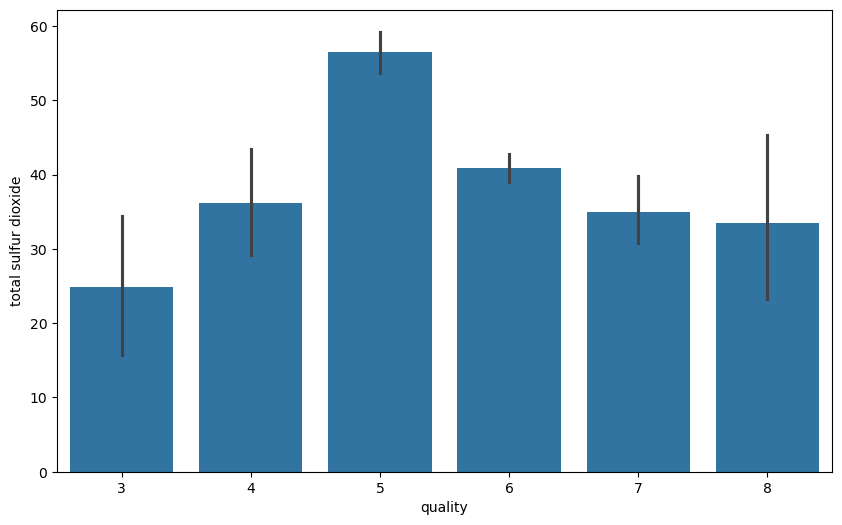

In [22]:
# Totlal sulfur vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

plt.show()

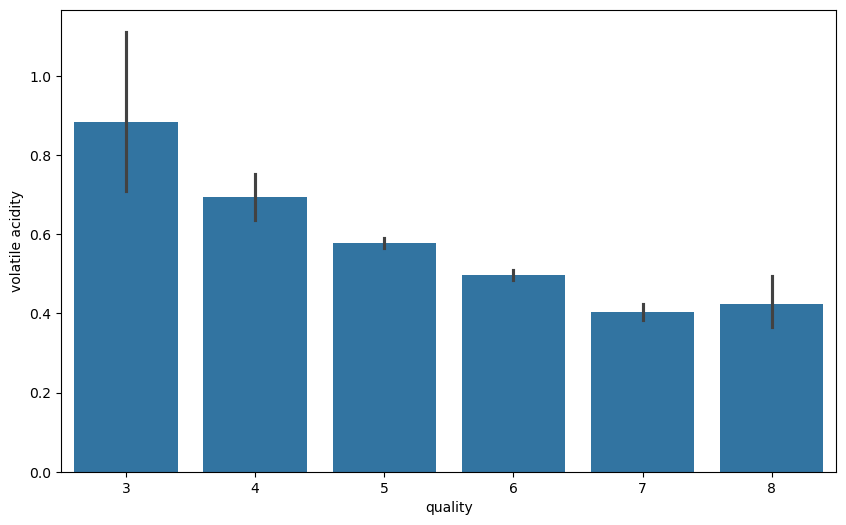

In [23]:
# Volatility vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

plt.show()

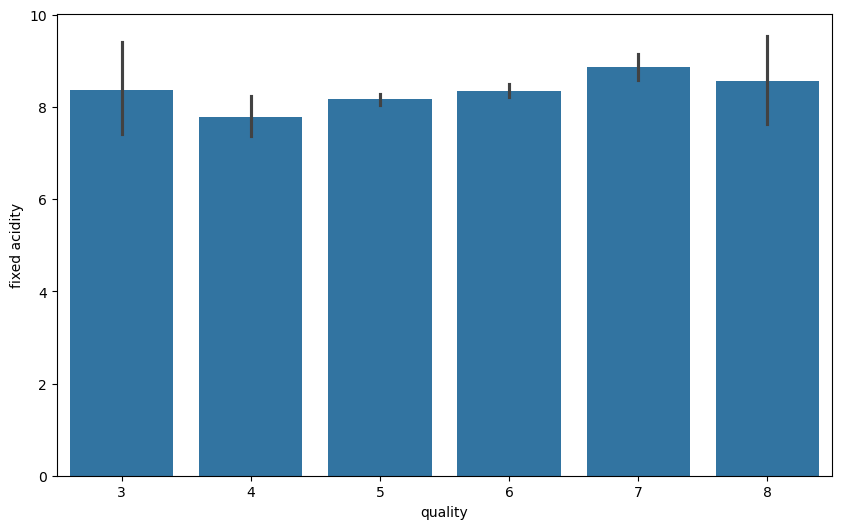

In [24]:
# Acidity vs Quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

plt.show()

### Categorizing the data

In [25]:
# Create categories of quality marked 1 and 0 
wine.quality = [1 if each >= 7 else 0 for each in wine.quality]
wine.quality

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [26]:
# Count items assigned to each catgeory 
wine.quality.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

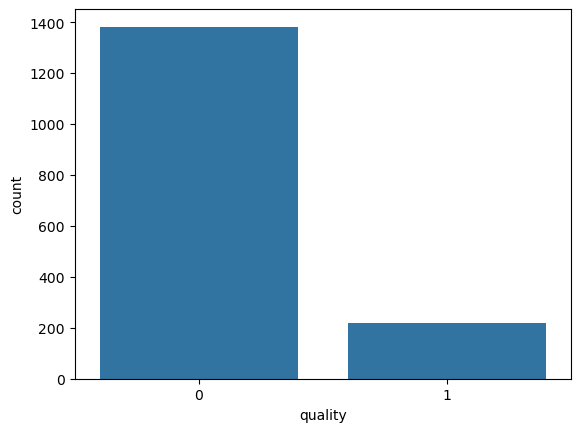

In [32]:
# Plot the categories
sns.countplot(wine, x='quality')

plt.show()



In [33]:
# Calues to predict
y = wine.quality.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# Remove dependant variable from data
x_data = wine.drop(["quality"],axis=1)
x_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Data preprocessing

In [36]:
# Normalize data set
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.025606,0.002422,0.000000,0.006574,0.000263,0.038062,0.117647,0.003453,0.012145,0.001938,0.032526
1,0.026990,0.003045,0.000000,0.008997,0.000339,0.086505,0.231834,0.003449,0.011073,0.002353,0.033910
2,0.026990,0.002630,0.000138,0.007958,0.000318,0.051903,0.186851,0.003450,0.011280,0.002249,0.033910
3,0.038754,0.000969,0.001938,0.006574,0.000260,0.058824,0.207612,0.003453,0.010934,0.002007,0.033910
4,0.025606,0.002422,0.000000,0.006574,0.000263,0.038062,0.117647,0.003453,0.012145,0.001938,0.032526
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.021453,0.002076,0.000277,0.006920,0.000311,0.110727,0.152249,0.003443,0.011938,0.002007,0.036332
1595,0.020415,0.001903,0.000346,0.007612,0.000215,0.134948,0.176471,0.003443,0.012180,0.002630,0.038754
1596,0.021799,0.001765,0.000450,0.007958,0.000263,0.100346,0.138408,0.003445,0.011834,0.002595,0.038062
1597,0.020415,0.002232,0.000415,0.006920,0.000260,0.110727,0.152249,0.003445,0.012353,0.002457,0.035294


In [37]:
# Training and Test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#### Random Forest Classifier

In [38]:
RF = RandomForestClassifier(n_estimators=200, random_state=1)
RF.fit(x_train,y_train)
predictions = RF.predict(x_test)
score = round(accuracy_score(y_test, predictions), 5)
print("Random Forest Score {}".format(score))


Random Forest Score 0.91875


#### Cross Validation: Cross-validation gives you a more reliable measure of your models quality.



In [39]:
RF_CrossValidation = cross_val_score(estimator=RF, X=x, y=y, cv = 40)
print("Random Forest Cross Validation Score ",RF_CrossValidation.max())

Random Forest Cross Validation Score  0.95


#### Stochastic Gradient Decent Classifier

In [40]:
SGD = SGDClassifier(penalty=None)
SGD.fit(x_train,y_train)
predictions = SGD.predict(x_test)
score = round(accuracy_score(y_test,predictions),5)
print("Stochastic Gradient Decent Score {}".format(score))

Stochastic Gradient Decent Score 0.9


#### Support Vector Machine Classifier

In [41]:
SVM = SVC(random_state=1)
SVM.fit(x_train,y_train)
predictions = SVM.predict(x_test)
score = round(accuracy_score(y_test,predictions),5)
print("Support Vector Machine Score {}".format(score))

Support Vector Machine Score 0.90312


#### Grid Search CV
-Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. 

In [42]:
param = {
    'C'     :[0.1,0.5,0.9,1,1.5,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
SVM_GridSearchCV = GridSearchCV(SVM, param_grid=param, scoring='accuracy', cv=40)
SVM_GridSearchCV.fit(x_train,y_train)
SVM_GridSearchCV.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [44]:
SVM_BestGridSearchCV1 = SVC(C = 0.1, gamma = 0.1, kernel = 'linear')
SVM_BestGridSearchCV1.fit(x_train,y_train)
predictions = SVM_BestGridSearchCV1.predict(x_test)
score = round(accuracy_score(y_test,predictions),5)
print("Support Vector Machine Grid Search CV Score {}".format(score))

Support Vector Machine Grid Search CV Score 0.9
